## Question 1

### Question 1.1


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

text_df = pd.read_csv('career_datasets.csv')
text_df.head()

,name,code,saqa_id,dep,aps,faculty,nqf,credits,desc,comments,school,url
0,Higher Certificate in Banking (98225),98225,84286,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The primary purpose of the q...,\r\nRules:\r\nStudents who have already passed...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...
1,Higher Certificate in Economic and Management ...,98237,90677,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The purpose of this qualific...,\r\nRules:Students should note that during the...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...
2,Higher Certificate in Marketing (98229),98229,84766,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The primary purpose of this ...,\r\nRules:\r\nThe College has replaced EUP1501...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...
3,Higher Certificate in Retailing (90014),90014,94791,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The purpose of the qualifica...,\r\nRules:\r\nStudents who have already passed...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...
4,Higher Certificate in Supervisory Management (...,90015,94630,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The purpose of this qualific...,\r\nRules:\r\nStudents should note that during...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...


### Question 1.2

In [32]:

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def preprocess(text):
    pattern=r'[^a-zA-Z\s]'
    clean_text = re.sub(pattern, '',text)
    clean_text = clean_text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(clean_text)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
    clean_text = ''.join(filtered_sentence)

    return clean_text

text_df['clean_text'] = text_df['comments'].apply(preprocess)
text_df.head()

,name,code,saqa_id,dep,aps,faculty,nqf,credits,desc,comments,school,url,clean_text
0,Higher Certificate in Banking (98225),98225,84286,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The primary purpose of the q...,\r\nRules:\r\nStudents who have already passed...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...,rulesstudentsalreadypassedbanqualificationreta...
1,Higher Certificate in Economic and Management ...,98237,90677,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The purpose of this qualific...,\r\nRules:Students should note that during the...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...,rulesstudentsnotecoursestudieswouldrequiredacc...
2,Higher Certificate in Marketing (98229),98229,84766,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The primary purpose of this ...,\r\nRules:\r\nThe College has replaced EUP1501...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...,rulescollegereplacedeupsusreplacedmnmbnustuden...
3,Higher Certificate in Retailing (90014),90014,94791,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The purpose of the qualifica...,\r\nRules:\r\nStudents who have already passed...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...,rulesstudentsalreadypassedmnmqualificationreta...
4,Higher Certificate in Supervisory Management (...,90015,94630,NaN,15,Economic and Management Sciences,5,120,Purpose statement:The purpose of this qualific...,\r\nRules:\r\nStudents should note that during...,NaN,https://www.unisa.ac.za/sites/corporate/defaul...,rulesstudentsnotecoursestudieswouldrequiredacc...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=50)
X = tfidf.fit_transform(text_df['clean_text']).toarray()
y= text_df['name'].values
X.shape


(558, 50)

### Question 1.3

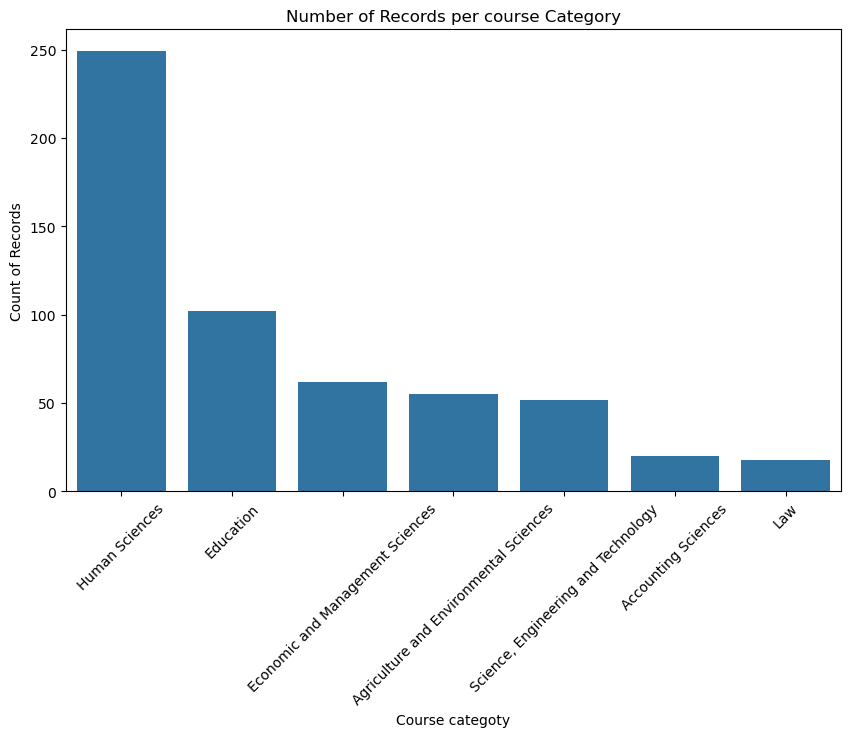

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x = 'faculty', data = text_df, order=text_df['faculty'].value_counts().index)

plt.xticks(rotation=45)
plt.title('Number of Records per course Category')
plt.xlabel('Course categoty')
plt.ylabel('Count of Records')
plt.show()

### Question 1.4

In [7]:
text_df['faculty'].value_counts()

faculty
Human Sciences                            249
Education                                 102
Economic and Management Sciences           62
Agriculture and Environmental Sciences     55
Science, Engineering and Technology        52
Accounting Sciences                        20
Law                                        18
Name: count, dtype: int64

In [9]:
from sklearn.utils import resample

max_size = text_df['faculty'].value_counts().max()

balanced_dfs =[]
for category, group in text_df.groupby('faculty'):
    balanced_group = resample(group, replace=True, n_samples=max_size, random_state=42)
    balanced_dfs.append(balanced_group)
balanced_df = pd.concat(balanced_dfs)

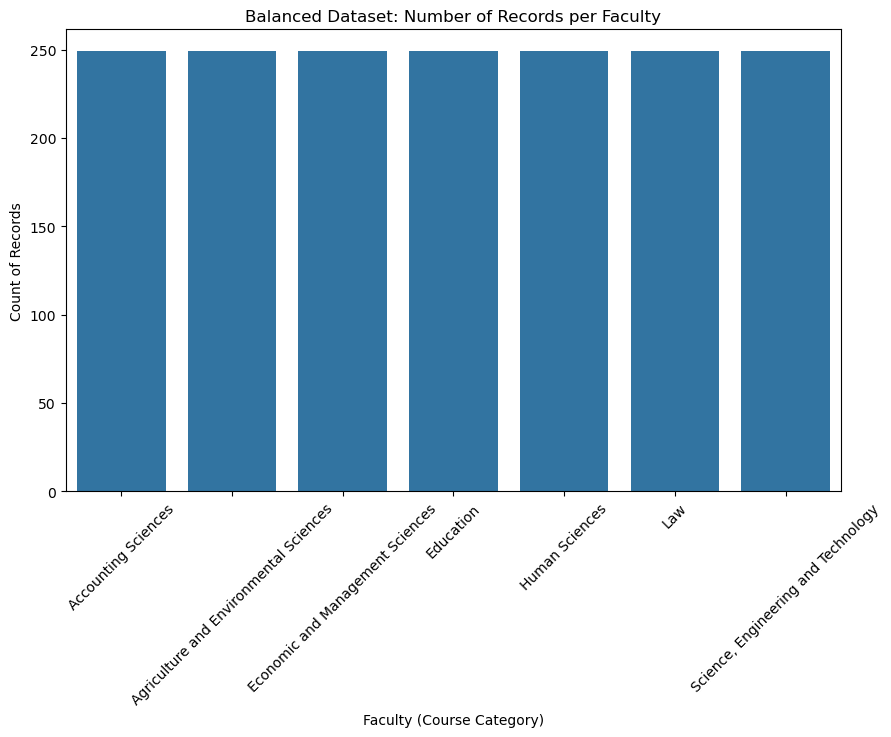

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='faculty', data=balanced_df,
              order=balanced_df['faculty'].value_counts().index)

plt.xticks(rotation=45)
plt.title("Balanced Dataset: Number of Records per Faculty")
plt.xlabel("Faculty (Course Category)")
plt.ylabel("Count of Records")
plt.show()


## Question 2

### Question 2.1

In [16]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

X = tfidf.fit_transform(balanced_df['clean_text']).toarray()
y= balanced_df['faculty'].values
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg= LogisticRegression(multi_class='ovr')
logreg_scores = cross_val_score(logreg, X, y, cv=kfold, scoring='accuracy')

print('Logistic Regression Average Accuracy:', logreg_scores.mean())

Logistic Regression Average Accuracy: 0.5926802358133254


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='linear')
svm_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='accuracy')
print("SVM Average Accuracy:", svm_scores.mean())

SVM Average Accuracy: 0.5926802358133254


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Maximum number of words to keep
max_words = 5000
# Maximum sequence length
max_len = 50

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(balanced_df['clean_text'])
sequences = tokenizer.texts_to_sequences(balanced_df['clean_text'])
X_seq = pad_sequences(sequences, maxlen=max_len)

y_seq = balanced_df['faculty'].values

# Encode labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_seq_enc = le.fit_transform(y_seq)


### Question 2.2

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

# One-hot encode target labels
y_cat = to_categorical(y_seq_enc)

vocab_size = min(max_words, len(tokenizer.word_index) + 1)
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Question 2.3

In [20]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []

for train_idx, test_idx in kfold.split(X_seq, y_seq_enc):
    X_train, X_test = X_seq[train_idx], X_seq[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]
    
    # Re-initialize model for each fold
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(LSTM(64))
    model.add(Dense(y_cat.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose=0)
    acc_scores.append(scores[1])

print("LSTM Average Accuracy:", np.mean(acc_scores))


LSTM Average Accuracy: 0.6511823654174804


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

max_words = 5000
max_len = 50

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(balanced_df['clean_text'])
sequences = tokenizer.texts_to_sequences(balanced_df['clean_text'])
X_seq = pad_sequences(sequences, maxlen=max_len)

y_seq = balanced_df['faculty'].values
le = LabelEncoder()
y_seq_enc = le.fit_transform(y_seq)
y_cat = to_categorical(y_seq_enc)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

vocab_size = min(max_words, len(tokenizer.word_index) + 1)
embedding_dim = 50

def create_rnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(64))
    model.add(Dense(y_cat.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [23]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rnn_acc_scores = []

for train_idx, test_idx in kfold.split(X_seq, y_seq_enc):
    X_train, X_test = X_seq[train_idx], X_seq[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]
    
    model = create_rnn_model()
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    rnn_acc_scores.append(scores[1])

print("RNN Average Accuracy:", np.mean(rnn_acc_scores))


RNN Average Accuracy: 0.6873332738876343


In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Use TF-IDF features from your balanced dataset
X = tfidf.fit_transform(balanced_df['clean_text']).toarray()
y = balanced_df['faculty'].values

# 5-fold stratified CV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nb_model = MultinomialNB()


In [25]:
nb_scores = cross_val_score(nb_model, X, y, cv=kfold, scoring='accuracy')
print("Naive Bayes Average Accuracy:", nb_scores.mean())


Naive Bayes Average Accuracy: 0.5565243882356816


Evaluating Logistic Regression...
Evaluating SVM...
Evaluating Naive Bayes...
Evaluating LSTM...
Evaluating Simple RNN...

MODEL COMPARISON RESULTS
                     accuracy  precision  recall  f1_score
Simple RNN             0.6804     0.8901  0.6804    0.6877
LSTM                   0.6644     0.8173  0.6644    0.6683
Logistic Regression    0.5927     0.8345  0.5927    0.5772
SVM                    0.5927     0.8345  0.5927    0.5772
Naive Bayes            0.5565     0.8235  0.5565    0.5606

BEST MODEL IDENTIFICATION
Best Model: Simple RNN
Best F1-Score: 0.6877

TOP 3 MODELS BY F1-SCORE
1. Simple RNN
   Accuracy: 0.6804
   Precision: 0.8901
   Recall: 0.6804
   F1-Score: 0.6877

2. LSTM
   Accuracy: 0.6644
   Precision: 0.8173
   Recall: 0.6644
   F1-Score: 0.6683

3. Logistic Regression
   Accuracy: 0.5927
   Precision: 0.8345
   Recall: 0.5927
   F1-Score: 0.5772



<Figure size 1200x800 with 0 Axes>

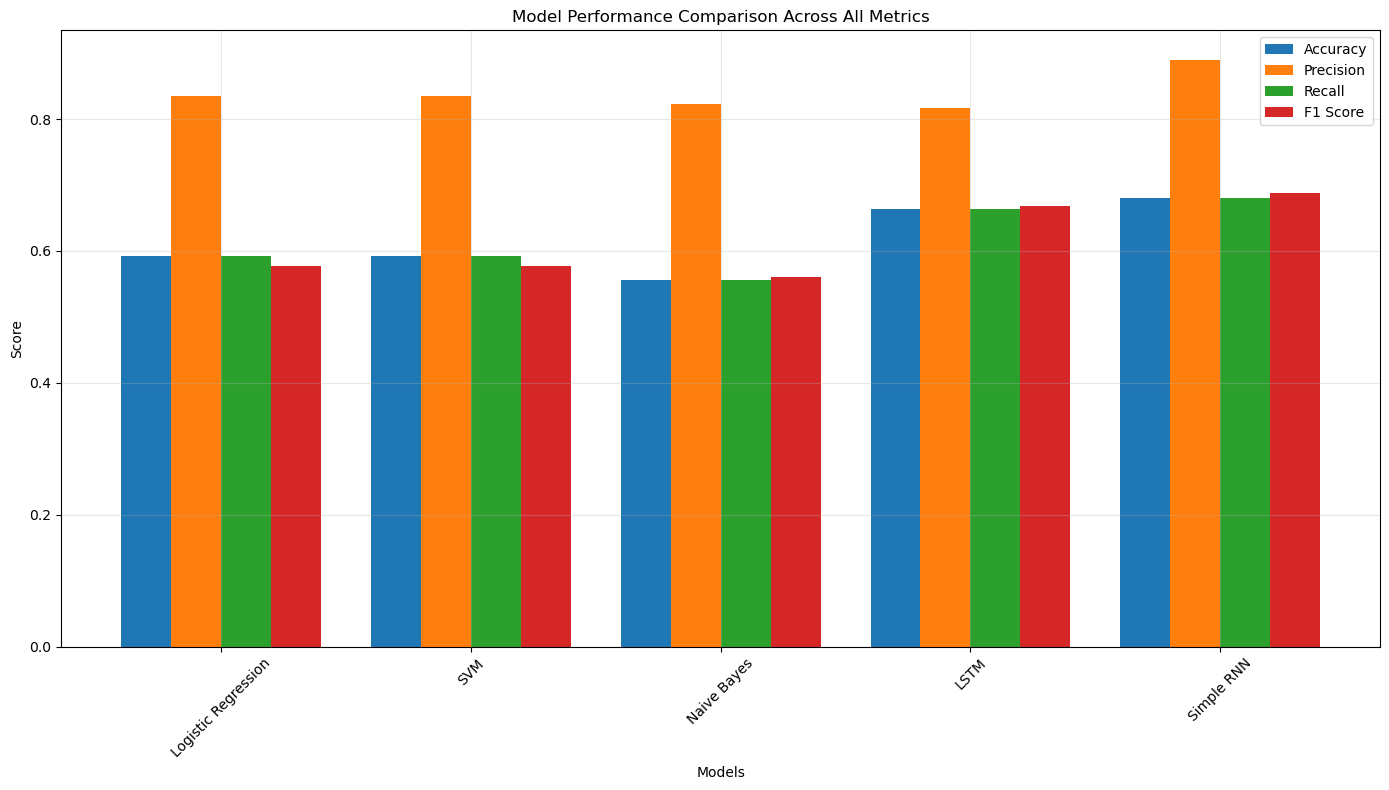

Results saved to 'model_comparison_results.csv'


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming your data preprocessing is already done and you have:
# balanced_df, tfidf, X, y, X_seq, y_cat, y_seq_enc, etc.

# Function to evaluate deep learning models with all metrics
def evaluate_dl_model(model_creator, X_seq, y_seq_enc, y_cat, cv_folds=5):
    kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for train_idx, test_idx in kfold.split(X_seq, y_seq_enc):
        X_train, X_test = X_seq[train_idx], X_seq[test_idx]
        y_train, y_test = y_cat[train_idx], y_cat[test_idx]
        y_test_labels = y_seq_enc[test_idx]  # Original integer labels for metrics
        
        # Create and train model
        model = model_creator()
        model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
        
        # Get predictions
        y_pred_proba = model.predict(X_test, verbose=0)
        y_pred_labels = np.argmax(y_pred_proba, axis=1)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test_labels, y_pred_labels)
        precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
        recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
        f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1_scores)
    }

# Prepare data for traditional ML models
X_tfidf = tfidf.fit_transform(balanced_df['clean_text']).toarray()
y_labels = balanced_df['faculty'].values

# Initialize cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metrics
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Results dictionary
results = {}

# 1. Logistic Regression
print("Evaluating Logistic Regression...")
logreg = LogisticRegression(multi_class='ovr', random_state=42, max_iter=1000)
logreg_scores = cross_validate(logreg, X_tfidf, y_labels, cv=kfold, scoring=scoring)
results['Logistic Regression'] = {
    'accuracy': logreg_scores['test_accuracy'].mean(),
    'precision': logreg_scores['test_precision_weighted'].mean(),
    'recall': logreg_scores['test_recall_weighted'].mean(),
    'f1_score': logreg_scores['test_f1_weighted'].mean()
}

# 2. SVM
print("Evaluating SVM...")
svm_model = SVC(kernel='linear', random_state=42)
svm_scores = cross_validate(svm_model, X_tfidf, y_labels, cv=kfold, scoring=scoring)
results['SVM'] = {
    'accuracy': svm_scores['test_accuracy'].mean(),
    'precision': svm_scores['test_precision_weighted'].mean(),
    'recall': svm_scores['test_recall_weighted'].mean(),
    'f1_score': svm_scores['test_f1_weighted'].mean()
}

# 3. Naive Bayes
print("Evaluating Naive Bayes...")
nb_model = MultinomialNB()
nb_scores = cross_validate(nb_model, X_tfidf, y_labels, cv=kfold, scoring=scoring)
results['Naive Bayes'] = {
    'accuracy': nb_scores['test_accuracy'].mean(),
    'precision': nb_scores['test_precision_weighted'].mean(),
    'recall': nb_scores['test_recall_weighted'].mean(),
    'f1_score': nb_scores['test_f1_weighted'].mean()
}

# 4. LSTM
print("Evaluating LSTM...")
def create_lstm_model():
    vocab_size = min(5000, len(tokenizer.word_index) + 1)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=50))
    model.add(LSTM(64))
    model.add(Dense(y_cat.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_results = evaluate_dl_model(create_lstm_model, X_seq, y_seq_enc, y_cat)
results['LSTM'] = lstm_results

# 5. Simple RNN
print("Evaluating Simple RNN...")
def create_rnn_model():
    vocab_size = min(5000, len(tokenizer.word_index) + 1)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=50))
    model.add(SimpleRNN(64))
    model.add(Dense(y_cat.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

rnn_results = evaluate_dl_model(create_rnn_model, X_seq, y_seq_enc, y_cat)
results['Simple RNN'] = rnn_results

# Create results DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

# Sort by F1-score to identify the best model
results_df_sorted = results_df.sort_values('f1_score', ascending=False)

print("\n" + "="*60)
print("MODEL COMPARISON RESULTS")
print("="*60)
print(results_df_sorted.to_string())

print(f"\n" + "="*60)
print("BEST MODEL IDENTIFICATION")
print("="*60)
best_model = results_df_sorted.index[0]
best_f1 = results_df_sorted.iloc[0]['f1_score']
print(f"Best Model: {best_model}")
print(f"Best F1-Score: {best_f1:.4f}")

# Show detailed comparison
print(f"\n" + "="*60)
print("TOP 3 MODELS BY F1-SCORE")
print("="*60)
for i, (model_name, row) in enumerate(results_df_sorted.head(3).iterrows()):
    print(f"{i+1}. {model_name}")
    print(f"   Accuracy: {row['accuracy']:.4f}")
    print(f"   Precision: {row['precision']:.4f}")
    print(f"   Recall: {row['recall']:.4f}")
    print(f"   F1-Score: {row['f1_score']:.4f}")
    print()

# Create a visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
x = np.arange(len(results_df.index))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_df[metric], width, label=metric.replace('_', ' ').title())

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison Across All Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(results_df.index, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Save results to CSV
results_df_sorted.to_csv('model_comparison_results.csv')
print(f"Results saved to 'model_comparison_results.csv'")

### Question 2.4

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
course_vectors = tfidf.fit_transform(text_df['clean_text'])

def recommend_courses(user_narrative, top_k=10):
    # Transform user narrative to TF-IDF vector
    user_vector = tfidf.transform([user_narrative])
    
    # Calculate cosine similarity between user narrative and all courses
    similarities = cosine_similarity(user_vector, course_vectors).flatten()
    
    # Get top-k most similar courses
    top_indices = similarities.argsort()[-top_k:][::-1]
    
    # Create recommendations dataframe
    recommendations = pd.DataFrame({
        'Course_Name': text_df.iloc[top_indices]['name'].values,
        'Faculty': text_df.iloc[top_indices]['faculty'].values,
        'Similarity_Score': similarities[top_indices],
        'Comments': text_df.iloc[top_indices]['comments'].values
    })
    
    return recommendations